# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [1]:
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

In [3]:
from sklearn.tree import DecisionTreeRegressor
x = np.random.exponential(size=sample_size)
noise = np.random.uniform(low=-1, high=1, size=sample_size)
y = f(x) + noise
regressor = DecisionTreeRegressor()
regressor.fit(x[:, np.newaxis], y)
predictions = regressor.predict(linspace[:, np.newaxis])

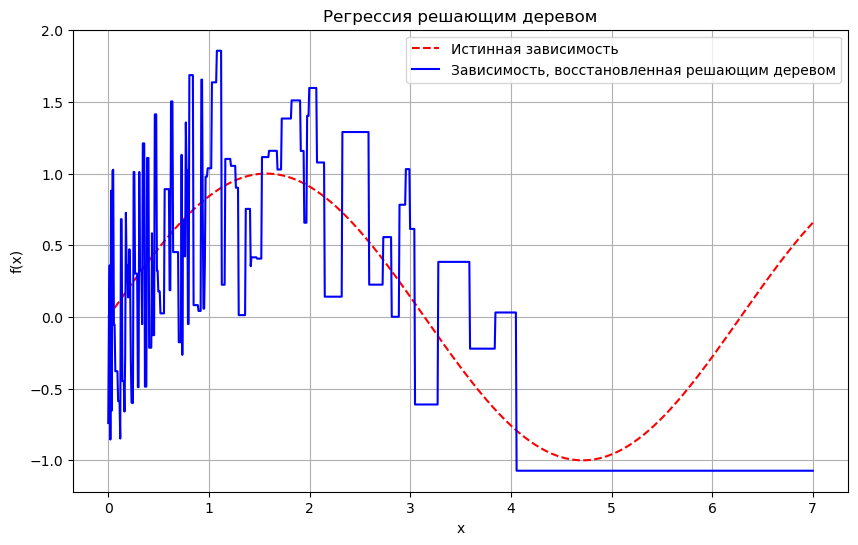

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(linspace, f(linspace), color='red', linestyle='dashed', label='Истинная зависимость')
plt.plot(linspace, predictions, color='blue', label='Зависимость, восстановленная решающим деревом')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Регрессия решающим деревом')
plt.legend()
plt.grid(True)
plt.show()

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

In [5]:
def depth(a):
    predictions = np.zeros((samples_num, len(linspace)))
    plt.figure(figsize=(10, 6))
    for i in range(samples_num):
        x = np.random.exponential(size=sample_size)
        noise = np.random.uniform(low=-1, high=1, size=sample_size)
        y = f(x) + noise
        regressor = DecisionTreeRegressor(max_depth = a)
        regressor.fit(x[:, np.newaxis], y)
        prediction = regressor.predict(linspace[:, np.newaxis])
        predictions[i] = prediction
        plt.plot(linspace, prediction, color='gray', alpha=0.5)
    mean_ = np.mean(predictions, axis=0)
    plt.plot(linspace, f(linspace), color='red', label='Истинная зависимость')
    plt.plot(linspace, mean_, color='black', label='Средняя зависимость')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

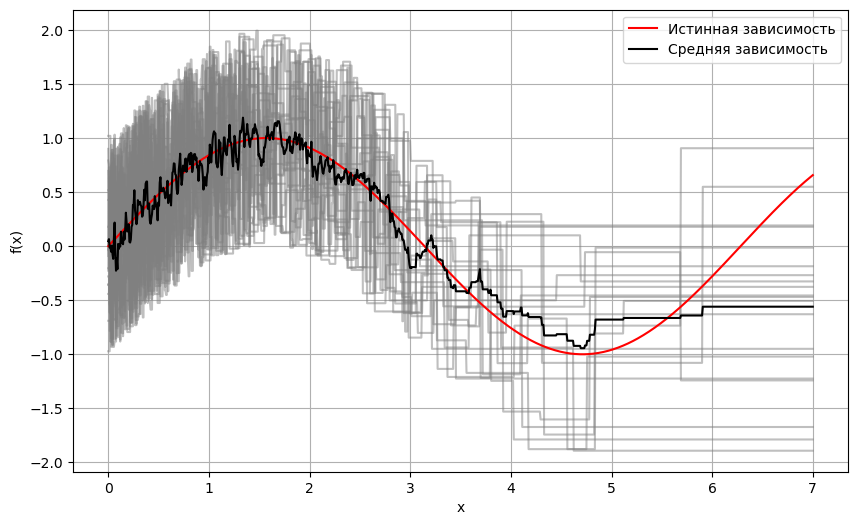

In [6]:
depth(None)

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

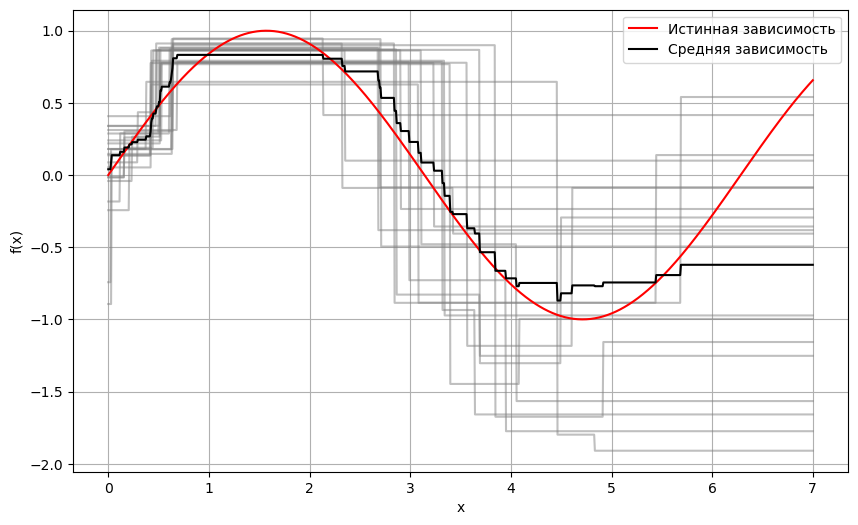

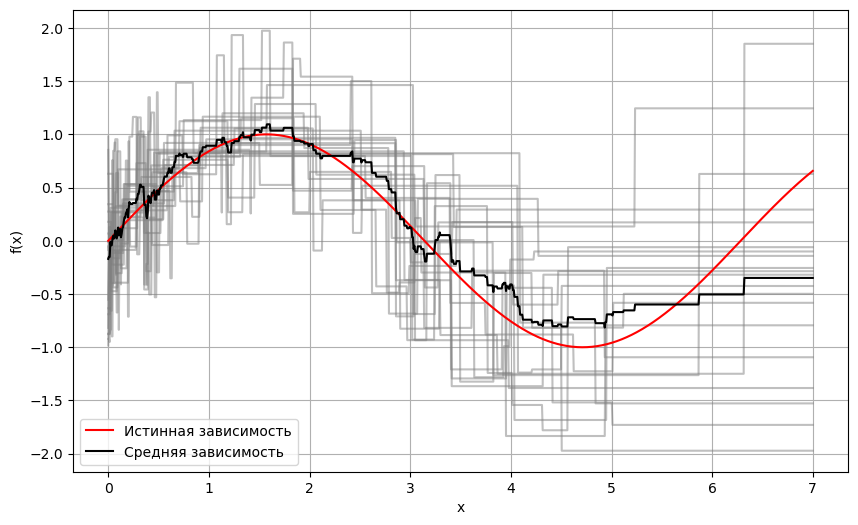

In [7]:
depth(2)
depth(4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:**
Лучше всего, где максимальная высота 4, потому что программа не успела переучиться, но и обучиться успела

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [8]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [9]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from '/Users/kseniashk/Downloads/task7_dstree_practice/hw3code.py'>

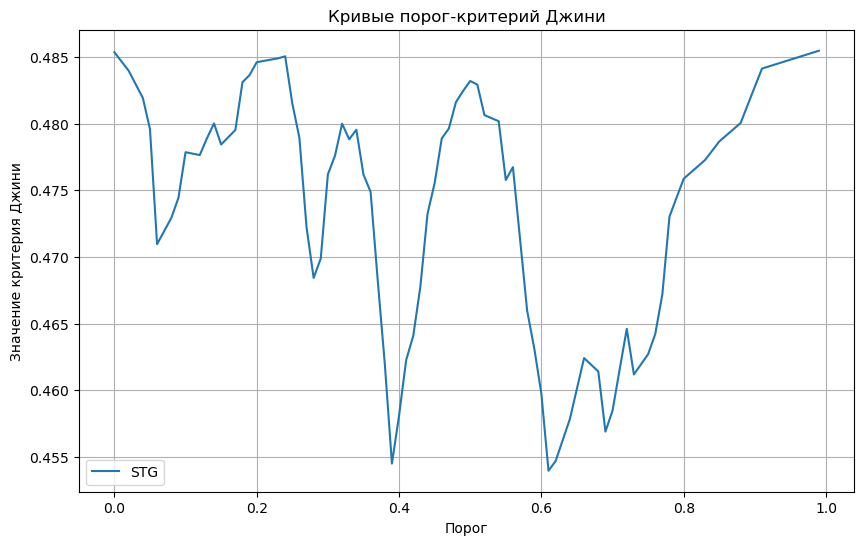

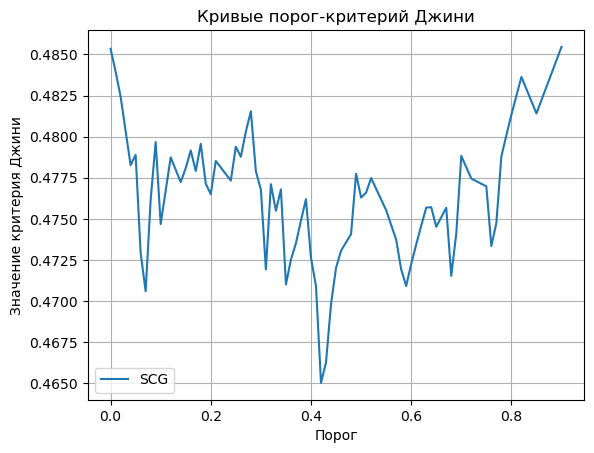

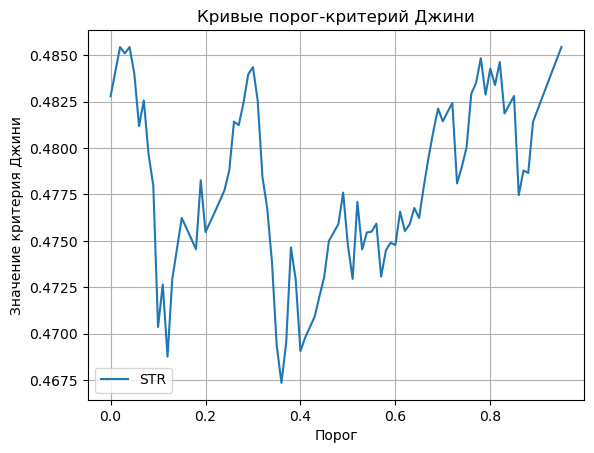

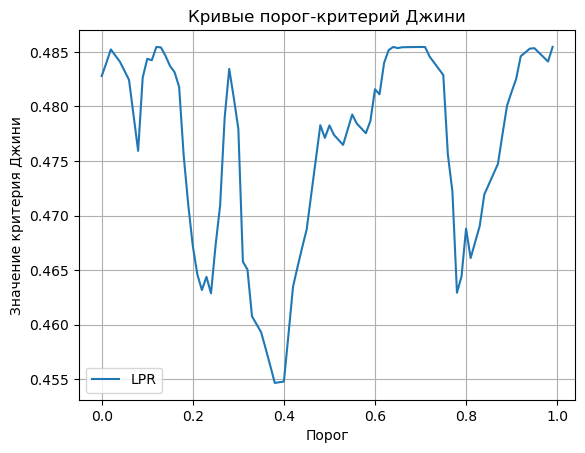

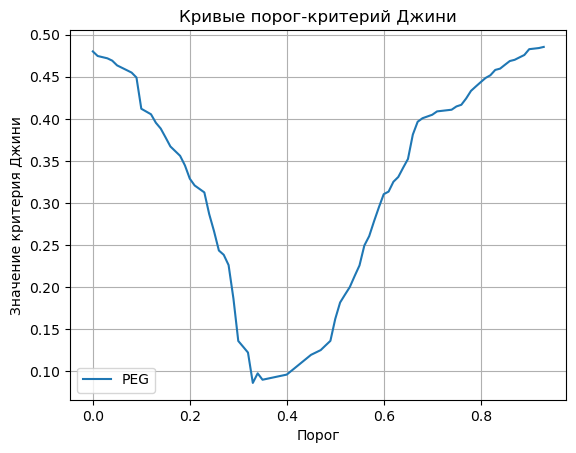

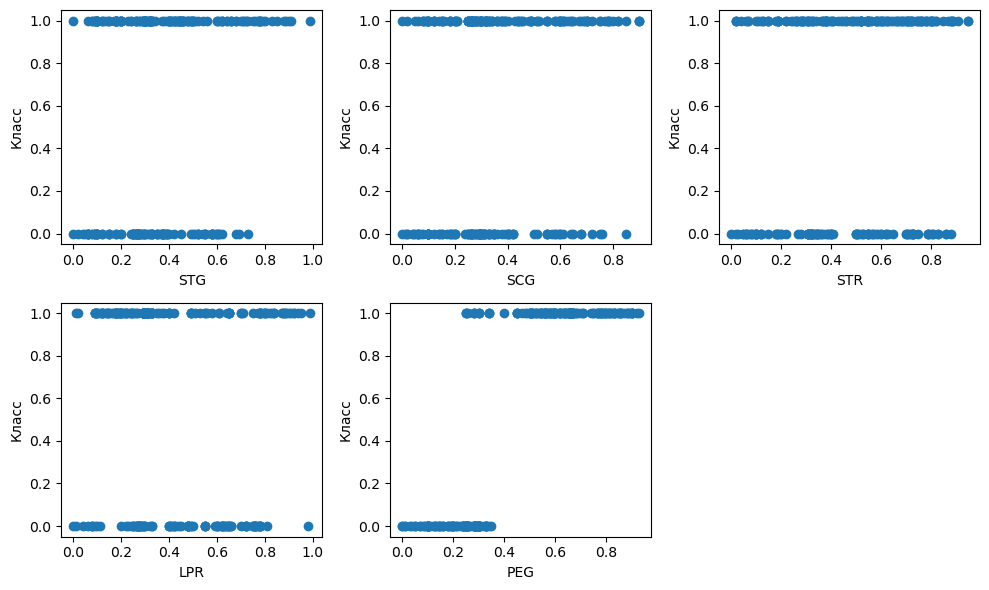

In [10]:
data = pd.read_csv('students.csv')
data2 = data.iloc[:, :5]
target = data.iloc[:, -1]

def gini_index(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini


plt.figure(figsize=(10, 6))

for feature in data2.columns:
    values = data2[feature]
    unique_ = np.sort(np.unique(values))
    ginis = []
    for i in unique_:
        lft = values <= i
        rgt = values > i
        left_gini = gini_index(target[lft])
        right_gini = gini_index(target[rgt])
        gini = (sum(lft) / len(target)) * left_gini + (sum(rgt)) / len(target) * right_gini
        ginis.append(gini)
    plt.plot(unique_, ginis, label=feature)
    plt.xlabel('Порог')
    plt.ylabel('Значение критерия Джини')
    plt.title('Кривые порог-критерий Джини')
    plt.legend()
    plt.grid(True)
    plt.show()

plt.figure(figsize=(10, 6))
for i, j in enumerate(data2.columns):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data2[j], target)
    plt.xlabel(j)
    plt.ylabel('Класс')
    plt.tight_layout()
plt.show()

__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

Для PEG, лучше всего подходят кривые, которые сначала убывают, а потом возрастают.
Scatter для PEG тоже показывает, что есть граница x,
при которой очень маленькое количество имеет класс 1 при этом число < x и количество, кто имеет класс 0 при этом число >= x

То есть я бы характиризовала это как, что это минимальное кол-во не подходящих под ограничение ((класс == 0 и PEG < x) или (класс == 1 и PEG >= x)) (ну или противоположное утверждение ((класс == 1 и PEG < x) или (класс == 0 и PEG >= x)))

Признаки по которым это практически невозможно это когда слишком много значений из 1 класс больше, чем значений из 0 и слишком много значений из 1 класс меньше, чем значений из 0

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('msh.csv', header=None)

label_encoder = LabelEncoder()
data_encoded = data.apply(label_encoder.fit_transform)

In [12]:
X = data_encoded.iloc[:, 1:]
y = data_encoded.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [13]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

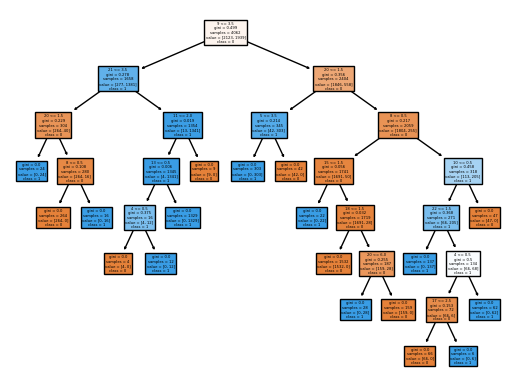

In [14]:
from sklearn import tree
tree.plot_tree(classifier, feature_names=list(X),
     class_names=['0', '1'],
     filled=True)
plt.show()

### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [15]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_csv('train.csv').iloc[:10000]

numeric_features = data.select_dtypes(include=np.number).drop(['target'], axis = 1)
X = numeric_features.fillna(0).values

y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_clf = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(n_estimators=100, random_state = 1)
rf_clf = RandomForestClassifier(n_estimators=100, random_state = 873)

dt_scores = cross_val_score(dt_clf, X_train, y_train, cv=3, scoring='accuracy')
bagging_scores = cross_val_score(bagging_clf, X_train, y_train, cv=3, scoring='accuracy')
rf_scores = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring='accuracy')

print("DecisionTreeClassifier :", np.mean(dt_scores))
print("BaggingClassifier with 100 trees:", np.mean(bagging_scores))
print("RandomForestClassifier with 100 trees:", np.mean(rf_scores))

DecisionTreeClassifier : 0.6637147209057775
BaggingClassifier with 100 trees: 0.7579988474299119
RandomForestClassifier with 100 trees: 0.7565719083629648


#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

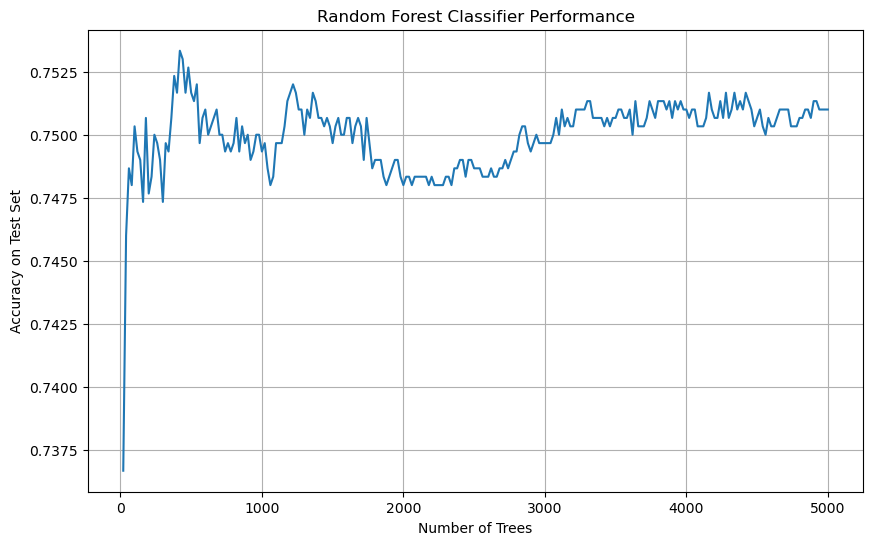

In [16]:
n_estimators = list(range(20, 5001, 20))
test_accuracies = []
rf_clf = RandomForestClassifier(warm_start=True)

for n in n_estimators:
    rf_clf.set_params(n_estimators=n)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, test_accuracies)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy on Test Set')
plt.title('Random Forest Classifier Performance')
plt.grid(True)
plt.show()

Да, в начале решение работало лучше, при n примерно 400 лушче, чем при n > 1000